# [Curso de Procesamiento del Lenguaje Natural (NLP) ](https://www.youtube.com/watch?v=Bex-G6sbjeE&list=PL7HAy5R0ehQVdPVLV6pIJA9ZE2vVyLRxX&index=3)

## Stop words

In [1]:
texto = "Hola, ¿Cómo estás?"
tokens = texto.split()
print(tokens)

['Hola,', '¿Cómo', 'estás?']


In [2]:
texto = "Hola, ¿Cómo estás?"
texto = texto.lower()
print(texto)
tokens = texto.split()
print(tokens)

hola, ¿cómo estás?
['hola,', '¿cómo', 'estás?']


In [3]:
texto = "El gato es negro y el perro es blanco"

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
stop_words = set(stopwords.words('spanish'))
print(stop_words)

{'estuvisteis', 'tuviésemos', 'que', 'habida', 'antes', 'otros', 'serían', 'estáis', 'estuvimos', 'él', 'habrá', 'tanto', 'nuestras', 'tened', 'esa', 'estos', 'hayáis', 'estará', 'les', 'algunas', 'estabas', 'sin', 'o', 'tuya', 'seremos', 'nuestro', 'e', 'serías', 'con', 'esté', 'tuvieseis', 'habremos', 'muy', 'ellas', 'al', 'siente', 'el', 'esto', 'eso', 'estuvieras', 'yo', 'estaré', 'tendríais', 'tenían', 'sentid', 'hubieras', 'tendréis', 'tuvieses', 'estaríamos', 'ante', 'a', 'estarías', 'tenidas', 'quien', 'mío', 'fueseis', 'fue', 'tuviera', 'míos', 'estadas', 'estuviésemos', 'somos', 'habríamos', 'se', 'estando', 'en', 'tendrías', 'estés', 'estabais', 'tienes', 'estuviesen', 'suyo', 'le', 'nuestros', 'sois', 'y', 'hubieron', 'tuvieras', 'fuésemos', 'serás', 'estado', 'suyos', 'sintiendo', 'tuviéramos', 'tenida', 'tiene', 'tengamos', 'mí', 'habías', 'eres', 'algunos', 'tus', 'habrás', 'habré', 'ni', 'otras', 'habrías', 'un', 'nosotras', 'fueses', 'tu', 'es', 'cual', 'teniendo', 'te

In [7]:
tokens = word_tokenize(texto)
print(tokens)

['El', 'gato', 'es', 'negro', 'y', 'el', 'perro', 'es', 'blanco']


In [8]:
texto_filtrado = [word for word in tokens if not word in stop_words]

In [9]:
"""
ValueError due to trying to unpack too many values in your for loop. When iterating over tokens, each element should be a tuple of (index, word). 
To fix the issue, you can use the enumerate function to generate the index along with the word in the loop. Here's the corrected code:
"""
        
for i, word in enumerate(tokens): 
    if not word in stop_words:
        print(f'word{i}: {word}')

word0: El
word1: gato
word3: negro
word6: perro
word8: blanco


In [10]:
print(texto_filtrado)

['El', 'gato', 'negro', 'perro', 'blanco']


In [11]:
texto = "El gato es negro y el perro es blanco"

In [12]:
texto = texto.lower()
tokens = word_tokenize(texto)
texto_filtrado = [word for word in tokens if not word in stop_words]
print(texto_filtrado)

['gato', 'negro', 'perro', 'blanco']


## Stemming y Lemmatization

El steamming es una técnica más simple ya que solo remueve prefijos y sufijos.

La lemmatización es más sofisticada y utiliza reglas del lenguaje para obtener la raíz de una palabra. Esta técnica en nltk no está disonible en español.

### Stemming

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jaime\AppData\Roaming\nltk_data...


True

In [14]:
from nltk.stem import SnowballStemmer

# Crear el stemmer en español
stemmer = SnowballStemmer('spanish')

# Probarlo en la palabra "caminar"
print(stemmer.stem('caminando'))
print(stemmer.stem('caminar'))
print(stemmer.stem('caminó'))

camin
camin
camin


### Lemmatization

In [15]:
# Descargar spacy y los paquetes necesarios para la lemmatización
# !pip install spacy -q
# !python -m spacy download es_core_news_sm -q

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [17]:
import spacy

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

# Crear un documento
doc = nlp("caminar caminando caminó")

# Imprimir el texto y el lema de cada token
for token in doc:
    print(token.text, "->", token.lemma_)

caminar -> caminar
caminando -> caminar
caminó -> caminar


## Ejemplo de modelo por tokenización simple (conteo de palabras) vs stemming (sin prefijos ni sufijos) vs lemmatization

#### 1. Tokenización

In [2]:
# Instalar y si ya está instalado actualizar
# !pip install -U scikit-learn

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("df_total.csv", encoding='UTF-8')

In [3]:
df

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion


In [4]:
df['news'][3]

'Con el dato de marzo el IPC interanual encadena su decimoquinta tasa positiva consecutiva. La inflación publicada por el INE se ha mantenido igual respecto al avance del 30 de marzo y se sitúa 22 puntos por encima del dato de febrero que ascendió al 76.De esos 22 puntos de diferencia la mayor parte la colocó el grupo de la vivienda 09 puntos por la subida de la electricidad y el del transporte 07 puntos por el alza de los carburantes. También impulsaron el IPC de marzo el aumento de los precios de la restauración y los servicios de alojamiento y al encarecimiento generalizado de los alimentos especialmente del pescado y el marisco de la carne de las legumbres y hortalizas y de la leche el queso y los huevos.Sin tener en cuenta la rebaja del impuesto especial sobre la electricidad y las variaciones sobre otros impuestos el IPC interanual alcanzó en marzo 107 nueve décimas más que la tasa general del 98. Así lo refleja el IPC a impuestos constantes que el INE también publica en el marco

In [5]:
# Separamos los datos en variables de entrada y etiquetas
X = df['news']
y = df['Type']

In [6]:
y.value_counts()

Type
Macroeconomia     340
Alianzas          247
Innovacion        195
Regulaciones      142
Sostenibilidad    137
Otra              130
Reputacion         26
Name: count, dtype: int64

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

432     En aras de seguir promoviendo la utilización d...
277     El suprarreciclaje es transformar un desecho e...
721     Como cambiarle a un coche su motor diésel por ...
852     El Consejo de Administración de Bbva acordó la...
678     En México el efectivo continúa siendo uno de l...
                              ...                        
1044    Teniendo en cuenta el Octavo Panel de Reputaci...
1095    En la actual coyuntura geopolítica, marcada po...
1130    En un mundo tan hiperconectado como el actual,...
860     El Acuerdo de Apertura Contra la Inflación y l...
1126    NuHome es una proptech que logró recaudar US75...
Name: news, Length: 973, dtype: object

In [9]:
# Vectorizing the text data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)  # Use transform() instead of fit_transform() for test data

In [10]:
# Mantiene las 973 observaciones y crea una matriz con 26512 palabras presentes y recontadas en todos los textos
X_train_transformed

<973x26512 sparse matrix of type '<class 'numpy.int64'>'
	with 233764 stored elements in Compressed Sparse Row format>

In [11]:
X_train_transformed_dense = X_train_transformed.toarray()
print(X_train_transformed_dense)

[[0 2 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]]


In [12]:
# Training the model
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

# Making predictions
y_pred = model.predict(X_test_transformed)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7991803278688525


#### 2. Stemming

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [14]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stemmer = SnowballStemmer('spanish')

In [16]:
def tokenize_and_stem(text):
    tokens = word_tokenize(text.lower())
    stems = [stemmer.stem(token) for token in tokens if token.isalpha()]
    return ' '.join(stems)

In [17]:
df['news_stemmer'] = df['news'].apply(tokenize_and_stem)

In [24]:
df[['news', 'news_stemmer']]

,news,news_stemmer
0,Durante el foro La banca articulador empresari...,durant el for la banc articul empresarial par ...
1,El regulador de valores de China dijo el domin...,el regul de valor de chin dij el doming que bu...
2,En una industria históricamente masculina como...,en una industri histor masculin com lo es la a...
3,Con el dato de marzo el IPC interanual encaden...,con el dat de marz el ipc interanual encaden s...
4,Ayer en Cartagena se dio inicio a la versión n...,ayer en cartagen se dio inici a la version num...
...,...,...
1212,En la vida de toda empresa emergente llega un ...,en la vid de tod empres emergent lleg un momen...
1213,La espiral alcista de los precios continúa y g...,la espiral alcist de los preci continu y gener...
1214,Las grandes derrotas nacionales son experienci...,las grand derrot nacional son experient trauma...
1215,BBVA ha alcanzado un acuerdo de colaboración c...,bbva ha alcanz un acuerd de colabor con barcel...


In [25]:
df['news_stemmer'][3]

'con el dat de marz el ipc interanual encaden su decimoquint tas posit consecut la inflacion public por el ine se ha manten igual respect al avanc del de marz y se situ punt por encim del dat de febrer que ascend al esos punt de diferent la mayor part la coloc el grup de la viviend punt por la sub de la electr y el del transport punt por el alza de los carbur tambien impuls el ipc de marz el aument de los preci de la restaur y los servici de aloj y al encarec generaliz de los aliment especial del pesc y el marisc de la carn de las legumbr y hortaliz y de la lech el ques y los ten en cuent la rebaj del impuest especial sobr la electr y las variacion sobr otros impuest el ipc interanual alcanz en marz nuev decim mas que la tas general del asi lo reflej el ipc a impuest constant que el ine tambien public en el marc de esta inflacion subyacent sin aliment no elabor ni product energet aument en marz cuatr decim hast su valor mas alto desd septiembr de de este mod la subyacent se situ mas de

In [26]:
# Separamos los datos en variables de entrada y etiquetas
X = df['news_stemmer']
y = df['Type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)  # Use transform() instead of fit_transform() for test data

# Training the model
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

# Making predictions
y_pred = model.predict(X_test_transformed)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8278688524590164


In [27]:
X_train_transformed

<973x11905 sparse matrix of type '<class 'numpy.int64'>'
	with 198177 stored elements in Compressed Sparse Row format>

El modelo mejoró un poco su accuracy de 79 a 82 pero el esfuerzo de precesamiento se redujo mucho 26512 vs 11905 dimensiones

#### 3. Lemmatization

In [30]:
import spacy
nlp = spacy.load('es_core_news_sm')

In [31]:
def lemmatize_text(text):
    doc = nlp(text.lower())
    lemmas = [token.lemma_ for token in doc if token.is_alpha] # los transforma en lemmas siempre cuando sean palabras
    return ' '.join(lemmas)

In [32]:
# Lemmatizar es más efectivo pero tarda más en procesar, no es automático como el stemming
df['news_lemma'] = df['news'].apply(lemmatize_text)

In [33]:
df[['news', 'news_stemmer', 'news_lemma']]

,news,news_stemmer,news_lemma
0,Durante el foro La banca articulador empresari...,durant el for la banc articul empresarial par ...,durante el foro el banca articulador empresari...
1,El regulador de valores de China dijo el domin...,el regul de valor de chin dij el doming que bu...,el regulador de valor de china decir el doming...
2,En una industria históricamente masculina como...,en una industri histor masculin com lo es la a...,en uno industria históricamente masculino como...
3,Con el dato de marzo el IPC interanual encaden...,con el dat de marz el ipc interanual encaden s...,con el dato de marzo el ipc interanual encaden...
4,Ayer en Cartagena se dio inicio a la versión n...,ayer en cartagen se dio inici a la version num...,ayer en cartagena él dar inicio a el versión n...
...,...,...,...
1212,En la vida de toda empresa emergente llega un ...,en la vid de tod empres emergent lleg un momen...,en el vida de todo empresa emergente llegar un...
1213,La espiral alcista de los precios continúa y g...,la espiral alcist de los preci continu y gener...,el espiral alcista de el precio continuar y ge...
1214,Las grandes derrotas nacionales son experienci...,las grand derrot nacional son experient trauma...,el grande derrota nacional ser experiencia tra...
1215,BBVA ha alcanzado un acuerdo de colaboración c...,bbva ha alcanz un acuerd de colabor con barcel...,bbva haber alcanzar uno acuerdo de colaboració...


In [34]:
df['news_lemma'][3]

'con el dato de marzo el ipc interanual encadenar su decimoquinto tasa positivo consecutivo el inflación publicado por el ine él haber mantener igual respecto al avance del de marzo y él situar punto por encima del dato de febrero que ascender al ese punto de diferencia el mayor parte él colocar el grupo de el vivienda punto por el subida de el electricidad y el del transporte punto por el alza de el carburante también impulsar el ipc de marzo el aumento de el precio de el restauración y el servicio de alojamiento y al encarecimiento generalizado de el alimento especialmente del pescado y el marisco de el carne de el legumbr y hortaliza y de el leche el queso y el tener en cuenta el rebaja del impuesto especial sobre el electricidad y el variación sobre otro impuesto el ipc interanual alcanzar en marzo nueve décima más que el tasa general del así él reflejar el ipc a impuesto constante que el ine también publicar en el marco de este inflación subyacente sin alimento no elaborado ni pro

In [35]:
# Separamos los datos en variables de entrada y etiquetas
X = df['news_lemma']
y = df['Type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)  # Use transform() instead of fit_transform() for test data

# Training the model
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

# Making predictions
y_pred = model.predict(X_test_transformed)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8237704918032787


In [36]:
X_train_transformed

<973x16556 sparse matrix of type '<class 'numpy.int64'>'
	with 193336 stored elements in Compressed Sparse Row format>

El accuracy del stemming daba 0.8279 y este lammatizado da 0.8238 y también es peor en dimensiones generadas 11.905 vs 16.556, por lo que elegiríamos el modelo 2, aunque habría que probar en un entorno de Producción con mayor volumen de datos.

## TF-IDF

In [2]:
import pandas as pd

In [6]:
df = pd.read_csv("movie_metadata.csv")
df.head()

,Id,movie_title,genero,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Avatar,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,2,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,3,Spectre,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,4,The Dark Knight Rises,Action|Thriller,deception|imprisonment|lawlessness|police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [15]:
df['genero'] = df['genero'].str.replace('|',' ')
df['plot_keywords'] = df['plot_keywords'].str.replace('|',' ')
df['texto'] = df['genero'] + ' ' + df['plot_keywords']

df[['genero', 'plot_keywords', 'texto']].head()

,genero,plot_keywords,texto
0,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Action Adventure Fantasy Sci-Fi avatar future ...
1,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Action Adventure Fantasy goddess marriage cere...
2,Action Adventure Thriller,bomb espionage sequel spy terrorist,Action Adventure Thriller bomb espionage seque...
3,Action Thriller,deception imprisonment lawlessness police offi...,Action Thriller deception imprisonment lawless...
4,Documentary,NaN,NaN


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [18]:
tfidf = TfidfVectorizer(max_features=2000)

In [23]:
df['texto'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5043 entries, 0 to 5042
Series name: texto
Non-Null Count  Dtype 
--------------  ----- 
4890 non-null   object
dtypes: object(1)
memory usage: 39.5+ KB


In [25]:
df['texto_2'] = df['texto'].copy()
df['texto_2'] = df['texto_2'].dropna()
df['texto_2'].fillna('', inplace=True)
X = tfidf.fit_transform(df['texto_2'])
X

<5043x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 43534 stored elements in Compressed Sparse Row format>

In [30]:
peliculas = pd.Series(df.index, index=df['movie_title'])
peliculas.index = peliculas.index.str.strip()
peliculas.head()

movie_title
Avatar                                        0
Pirates of the Caribbean: At World's End      1
Spectre                                       2
The Dark Knight Rises                         3
Star Wars: Episode VII - The Force Awakens    4
dtype: int64

In [33]:
indice = peliculas['The Dark Knight Rises']

In [36]:
consulta = X[indice]

In [42]:
print(consulta)

  (0, 1348)	0.43255258776924554
  (0, 1244)	0.37372637790797764
  (0, 1355)	0.26464914286128555
  (0, 880)	0.4803986074599995
  (0, 473)	0.459980436398304
  (0, 1778)	0.3444254460643981
  (0, 1793)	0.1393353819650984
  (0, 39)	0.1509292018464259


In [38]:
consulta.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [39]:
similitud = cosine_similarity(consulta, X)
similitud

array([[0.02801531, 0.02208209, 0.1841875 , ..., 0.        , 0.        ,
        0.        ]])

In [43]:
# Similitud consigo misma
similitud[0][3]

1.0

In [45]:
similitud = similitud.flatten()
similitud

array([0.02801531, 0.02208209, 0.1841875 , ..., 0.        , 0.        ,
       0.        ])

In [46]:
similitud[3]

1.0

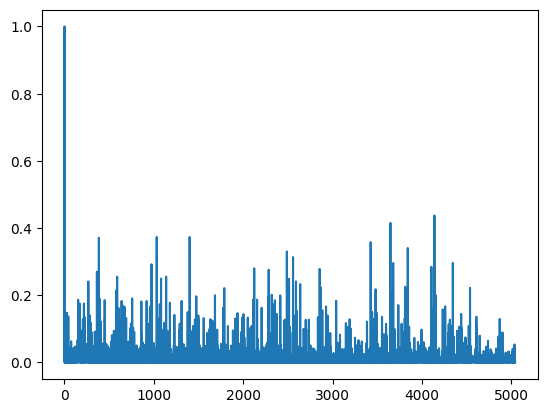

In [47]:
import matplotlib.pyplot as plt
plt.plot(similitud)

In [48]:
# Id de pelis más parecidas a The Dark Knight Rises
(-similitud).argsort()

array([   3, 4139, 3647, ..., 2380, 2365, 5042], dtype=int64)

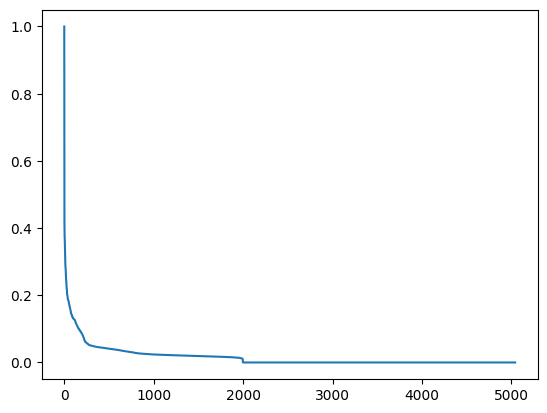

In [49]:
plt.plot(similitud[(-similitud).argsort()])

In [50]:
# 10 peliculas más parecidas sin contar a la propia película
recomendacion = (-similitud).argsort()[1:11]

In [51]:
df['movie_title'].iloc[recomendacion]

4139                        AWOL-72 
3647                       Deadfall 
1034                        The One 
1402                Lethal Weapon 3 
387                 The Devil's Own 
3426                        Swelter 
3841                 Police Academy 
2489                  Let's Be Cops 
2558                       Hot Fuzz 
4345    The Marine 4: Moving Target 
Name: movie_title, dtype: object